We wanted to test ketu on recovering injected planets. So, we injected the 158 known EBs in campaign 0 with planets and attempted to recover them. 

In [9]:
%matplotlib inline
import ketu, sys, pickle, shutil, os
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as pl
from astropy.io import fits, ascii
import remove_EB as remEB

In [10]:
path = "/k2_data/c0_known_EB_lc/"
contents = os.listdir(path)
contents = [fn for fn in contents if ("_injected_clip.result" in fn)]
epicid = np.array([fn.split("-")[0][4:] for fn in contents],dtype=np.int32)
ref = ascii.read("/k2_data/c0_EB")
ref = [ref[list(ref['KIC/EPIC']).index(ind)] for ind in epicid]

In [58]:
hdulist = fits.open(path + contents[0].split(".")[0] + ".fits")

In [60]:
hdulist[3].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   16 / length of dimension 1                          
NAXIS2  =                    2 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    4 / number of table fields                         
TTYPE1  = 'ingress '                                                            
TFORM1  = 'E       '                                                            
TTYPE2  = 'center  '                                                            
TFORM2  = 'E       '                                                            
TTYPE3  = 'egress  '        

In [61]:
inj_period, inj_rpbyrs, inj_tdepth, inj_tctime, inj_prad, inj_srad, inj_smass, inj_impact = [], [], [], [], [], [], [], []
for fn in contents:
    hdulist = fits.open(path + fn.split(".")[0] + ".fits")
    head = hdulist[3].header
    inj_period += [head['PERIOD']]
    inj_rpbyrs += [head['RRATIO']]
    inj_tdepth += [head['TDEPTH']]
    inj_tctime += [head['TCTIME']]
    inj_prad += [head['PRADRJ']]
    inj_srad += [head['SRADRS']]
    inj_smass += [head['MSTAR']]
    inj_impact += [head['IMPACT']]
    hdulist.close()

In [12]:
recovered_period = []
for fn in contents:
    with open(path + fn,'r')as f:
        result = pickle.load(f)
        recovered_period += [result['peaks'][0]['period']]

In [28]:
second_recover = []
for fn in contents:
    with open(path + fn,'r')as f:
        result = pickle.load(f)
        if len(result['peaks']) >= 2:
            second_recover += [result['peaks'][1]['period']]
        else:
            second_recover += [-1.]

In [50]:
eb_period = [row['period'] for row in ref]

Below is a schematic of recovery rate. In an ideal world, everything would be on the faint blue line.

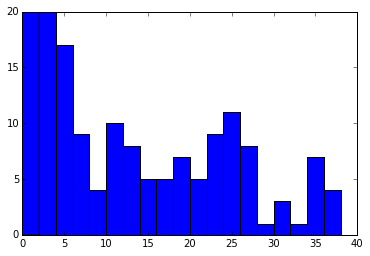

In [89]:
pl.hist(inj_tdepth, np.arange(0,40,2))
pl.show()

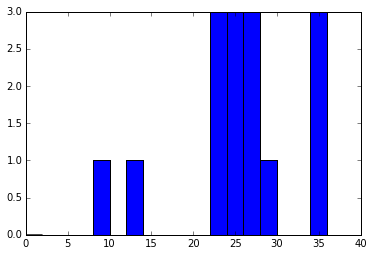

In [90]:
inj_tdepth = np.array(inj_tdepth)
success = np.array(recovered_period)/np.array(expected_period)
pl.hist(inj_tdepth[(success > 0.8) * (success < 1.2)], np.arange(0,40,2))
pl.show()

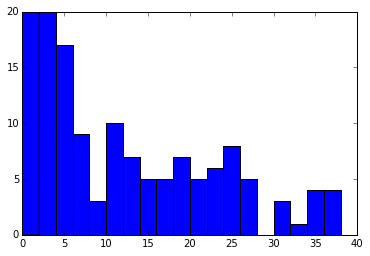

In [91]:
inj_tdepth = np.array(inj_tdepth)
success = np.array(recovered_period)/np.array(expected_period)
pl.hist(inj_tdepth[(success < 0.8) | (success > 1.2)], np.arange(0,40,2))
pl.show()

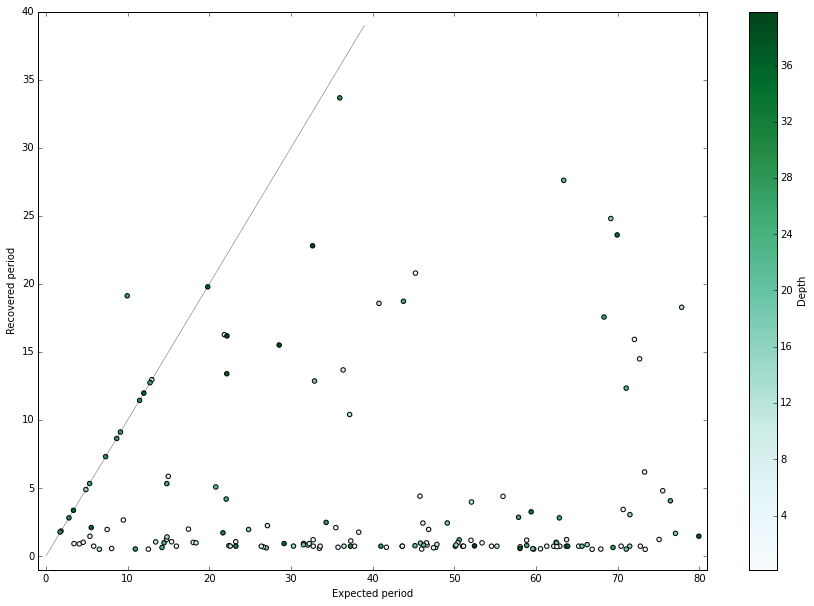

In [94]:
fig = pl.figure(figsize=(15,10))
pl.scatter(inj_period, recovered_period, c=inj_tdepth,cmap='BuGn')
#pl.scatter(expected_period, second_recover, c='red',s=15,lw=0)
pl.plot(range(40), 'k',lw=0.3 )
pl.ylabel("Recovered period")
pl.xlabel("Expected period")
pl.xlim(-1,81)
pl.ylim(-1,40)
pl.colorbar(label= "Depth")
pl.show()

I thought maybe we were picking up poorly clipped EBs at the higher end, so I compared that. That doesn't seem to be the case from below

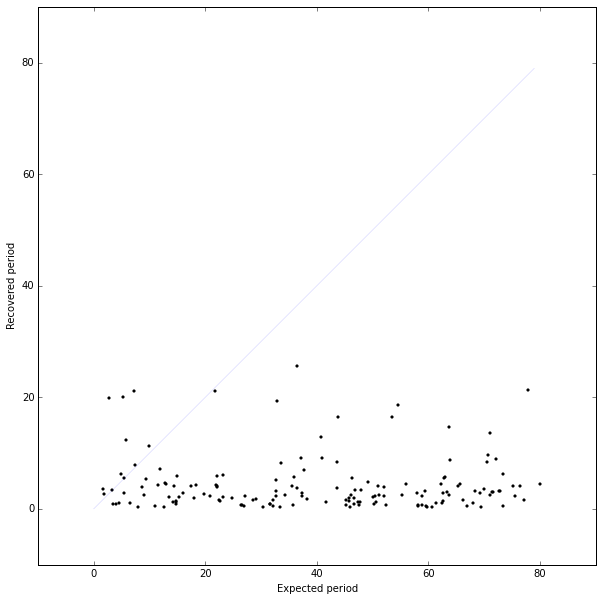

In [54]:
fig = pl.figure(figsize=(10,10))
#pl.scatter(expected_period, recovered_period, c='black',s=10,lw=0)
pl.scatter(expected_period, eb_period, c='black',s=10,lw=0)
pl.plot(range(80), lw=0.1)
pl.ylabel("Recovered period")
pl.xlabel("Expected period")
pl.show()

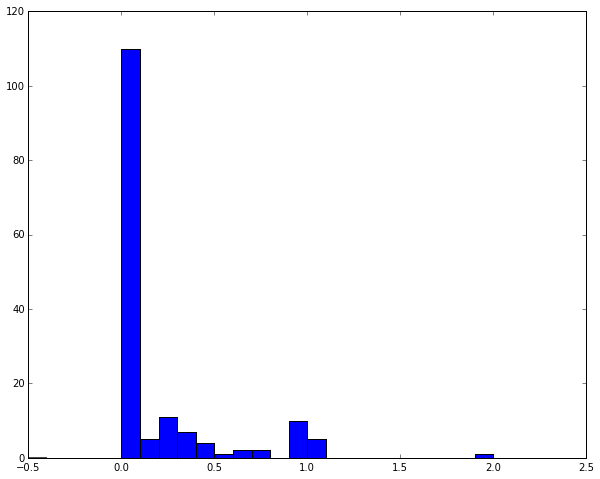

In [46]:
fig = pl.figure(figsize=(10,8))
pl.hist(np.array(recovered_period)/np.array(expected_period), np.arange(-0.5, 2.5, 0.1))
pl.show()

In [ ]:
np.array(recovered_period)/np.array(expected_period),

In [41]:
pct_diff= (np.array(expected_period) - np.array(recovered_period))/(0.5*(np.array(expected_period) + np.array(recovered_period)))

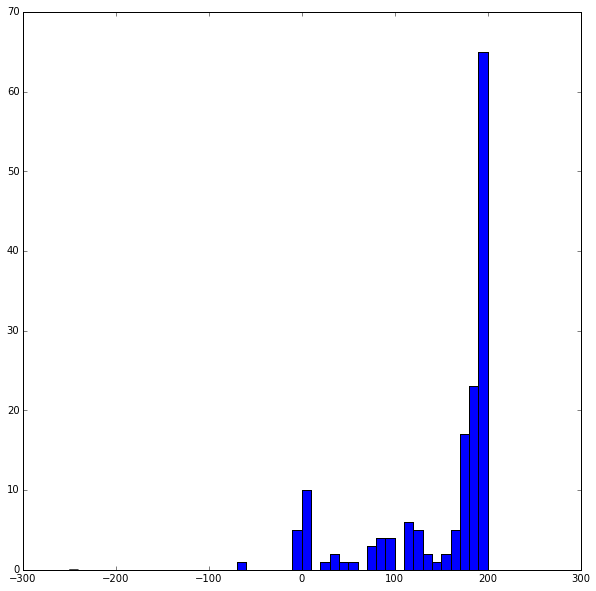

In [49]:
fig = pl.figure(figsize=(10,10))
pl.hist(pct_diff*100, 100*np.arange(-2.5,2.5,0.1))
pl.show()